# The Spark Foundation

# Objective
To predict the result by using scikit library for machine learning to implement in regression function


# Author : Abhay Singh
***
# Date : 04-04-2021

In [166]:
# url of the given data
path = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

# Loading the Given Data 

In [167]:
# Importing all libraries required in this assignment 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [168]:
# loading the data using read_csv function from pandas library
df = pd.read_csv(path)

In [169]:
# printing first five rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [170]:
#print the generalized info of the given dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [171]:
# dimension the given dataframe
df.shape

(25, 2)

In [172]:
# Summary of the Given Data
df.describe(include = "all")

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plotting a graph between Scores and Hours 

Text(0, 0.5, 'Marks Scored')

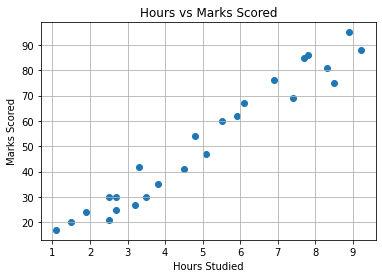

In [173]:
x = df["Hours"]
y = df["Scores"]
plt.scatter(x,y)
plt.grid()
plt.title("Hours vs Marks Scored")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")

In [174]:
# lets see the correlation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


As you can clearly See that the both the Hours studied and Marks obtained is closely related with Each Other

# Creating Training And Testing Dataset

In [175]:
x_data = df[["Hours"]]
y_data = df["Scores"]

# randomly split our data into training and testing data using the function train_test_split.
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)


# Now We will Train the Algorithm

In [176]:
# importing Linear Regression module from sklearn library
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

In [177]:
# so the Given line is represented as 
line = lm.coef_*x_data + lm.intercept_

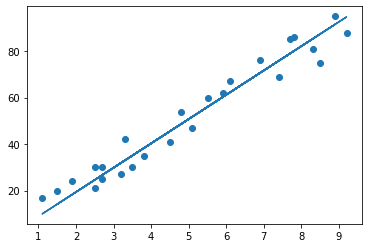

In [178]:
# plotting the graph for the Test Data
plt.scatter(x_data,y_data)
plt.plot(x_data,line)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

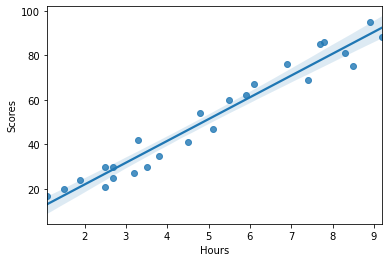

In [179]:
# We can directly obtained a graph by using regplot function of seaborn library
sns.regplot(x = "Hours",y = "Scores",data = df)

# Predictions

In [180]:
# We have train our algorithm now its time to make the prediction so
y_prediction = lm.predict(x_test)

In [181]:
# Now we will compare the actual value and predicted value with a graph
df1 = pd.DataFrame({"True Value":y_test,"Predicted Value":y_prediction})
df1.head()

,True Value,Predicted Value
14,17,9.970262
13,42,32.984700
17,24,18.339148
3,75,87.382463
21,54,48.676362


<AxesSubplot:>

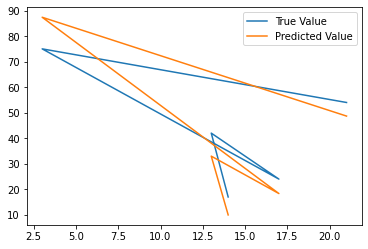

In [182]:
df1.plot()

In [183]:
# predicting the Value
given_hours = pd.DataFrame({9.25})
pred_score = lm.predict(given_hours)
print(f"Predicted score from the trained Model is {pred_score}")
print()

Predicted score from the trained Model is [95.22829438]



In [184]:
# Evaluating the Model
from sklearn.metrics import mean_absolute_error,r2_score
print('Mean Absolute Error:',mean_absolute_error(y_test, y_prediction)) 
print("R-2 Score:",r2_score(y_test,y_prediction))

Mean Absolute Error: 7.882398086270432
R-2 Score: 0.8421031525243527
